<a href="https://colab.research.google.com/github/melw2/hds-blog/blob/main/Copy_of_Final_Assignment_Melissa_Weerappah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)

---

<br>
© 2022 Copyright The University of New South Wales - CRICOS 00098G

**Authors**: Oscar Perez-Concha and Zhisheng (Sandy) Sa.

**Communications**: If you have any questions, please email Oscar and Sandy at: o.perezconcha@unsw.edu.au and z.sa@unsw.edu.au

**Please use email exclusively for communication with us regarding this assignment.**

# Final Assignment 



---



#####################################################################################

Double-click to write down your name and surname.

**Name and Surname:**

Melissa Weerappah

**Honour Pledge** <p>
    
    
Declaration: <p>
    Yes
    
I declare that this assessment item is my own work, except where acknowledged, and has not been submitted for academic credit elsewhere or previously, or produced independently of this course (e.g. for a third party such as your place of employment) and acknowledge that the assessor of this item may, for the purpose of assessing this item: 

1. Reproduce this assessment item and provide a copy to another member of the University; and/or 

2. Communicate a copy of this assessment item to a plagiarism checking service (which may then retain a copy of the assessment item on its database for the purpose of future plagiarism checking). 

#####################################################################################

---
# 1.  Health Data Science Scenario
 
## 1a. Research Question

Our hospital has been very proactive in terms of analysing data of its electronic medical record (EMR). By analysing the data, they have made very interesing discoveries:

1. They identified that readmitted patients are not only those who were sicker in the first admission, but those who had less support at home after discharge or those patients that did not have a medical follow-up after discharge.
2. Readmitted patients experienced high levels of emotional stress.
3. Readmitted patients were at much higher risk of acquiring new infections while at hospital.
4. Readmissions are highly costly. Patients that were readmitted for the reasons cited above tended to be sicker than they were when they were first admitted and their length of stay was significantly longer than their first admission.

Our hospital has trialed a "specialised unit" that coordinates the patient's discharge. A team of nurses and OTs visit the patient's home after discharge. The frequency of the visits depends upon an assessment made before discharge, but the average number of visits is 5 across the board. Amongst other things, they make sure that the wounds are healing properly, medication is taken, that there is coordination with a GP in place and basic daily activities can be done, such as moving around their home, toilet, cooking, ...
In addition, the specialised unit regularly contacts the patients via telephone to check that everything is going well. The patients can also contact the specialised unit if they need any help. 

This pilot has drastically reduced the number of readmissions. 

In addition, the cost of operating the specialised unit was much cheaper than the cost of readmissions.

In terms of budget:
1. A day in hospital costs 5,000 dollars per day on average; readmitted patients tend to stay an average of 4 days.
2. A home visit of the specialised unit costs 400 dollars; the average number of visits is 5. 
3. No targeted patients: 0 dollars

Our hospital is now ready to roll out and implement the specialised unit service to all patients at risk for readmission. 
The problem is that a priori, they do not know which patients are at risk of readmission. Thus, they do not know the patients they should be targeting.


<b><font color=green>Goal/Research Question: </font>
1. The hospital needs a machine learning algorithm to predict which patients should participate in this intervention. The prediction will be done just before discharge. They are hiring you to build this algorithm.

2. You will need to explain to the hospital managers the performance of your algoritm, so they can make an informed decision whether to use your algorithm or not.



---



## 1b. Instructions

1. We are going to deliver one predictive model to predict readmission to hospital within 30 days of discharge. 

2. Check and study the data provided. Read the data dictionary carefully and check again the plots and graphs created in the exercises corresponding to weeks 1, 2 and 3. 

3. Since the data have been already provided by the hospital, we are going to skip the next steps of the health data science workflow (see image below). 
  - Step 3 and substeps 3a,3b,3c,3d,3e: Data Gathering.

4. Step 4, substep 4a: Data visualization. Visualize the data in your draft, but do not include the graphs in the final submission.

5. The hospital wants the model to capture as many "readmissions" as posible (true positives) even at the expense of <font color='green'><b> moderately</b> </font> increasing the number of false positives <font color='green'><b>  within reason</b></font> (that is, patients that are not at risk of readmission that are classified as readmission). 

6. Nevertheless, we must take into account that the hospital does not have unlimited resources, so they cannot considered a high number of patients at risk of readmission because the cost of the "specialised unit" would be very high.  

7. You will design several machine learning algorithms, choose one, and give a rationale explaining why you choose that algorithm. 

    * Build some predictive models to predict readmission to hospital within 30 days of discharge using:  
        *  'Logistic Regression Classifiers' 
        * 'Random Forest Classifier'. 
        
8. Use the `classification_report` and confusion matrix metrics to evaluate your models. If you use other metrics, such as the ROC curve, do not include them in the final submission.

9. <b> Very Important: Justify your decisions and why they were made in the space provided.</b>   Write <b>one or two sentences</b> for each section before each block of Python code with the description of what the blocks do; explanations must be clear; no “sanity checks” (although these checks are encouraged during the construction of the algorithms); 

10. Print clear labels in the printed results and explain in short and concise sentences the steps that you followed. 

11. Comment and document your code, as you will most likely later work in teams developing such algorithms.

12. Format: Jupyter Notebook.
13. Programming Language: Python.
14. Platform: Google Colab.
15. The assignment will be mark using the rubric provided in the outline

16. **Submission: Upload the Jupyter Notebook in OpenLearning, in the section provided for that and on your GitHub space. The application wil close at exactly the date and time of the deadline.**

17. Marks will be deducted if these instructions are not followed.

18. <b><font color=green>Only the final version of the document must be submitted. </font></b>. 

19. Add your name and surname to the name of this document. For example. `Final-Assignment-Oscar-PerezConcha.ipynb`

20. Each question is 10 marks, except question 8 that is 20 marks.

21. If you have any questions, please email Oscar and Sandy at:
o.perezconcha@unsw.edu.au and z.sa@unsw.edu.au

![alt text](https://drive.google.com/uc?export=view&id=105SGqeyo8RgLhSO8mN7ZE5OsG0YiLPKt)



---



In [1]:
# check required libraries are installed if not calling system to install
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas', 'plotnine', 'matplotlib', 'seaborn', 
            'grid', 'shap', 'scikit-learn'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    print('Installing: ', missing)
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
# delete unwanted variables
del required 
del installed 
del missing

Installing:  {'grid', 'shap'}


In [2]:
# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Mounted at /content/drive


Change the project paths and the paths according to where you have placed your files: 

In [3]:
from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    project_path = Path(root) / 'MyDrive' / 'HDAT9500' / 'final-assignment'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()



---
Function to plot the confusion matrix:


In [4]:
def plot_confusion_matrix(confusion_matrix):
  # visualise the confusion matrix
  labels = ['No', 'Yes']
  ax = plt.subplot()
  sns.heatmap(confusion_matrix, annot = True, fmt = '.0f', ax = ax, cmap = 'viridis')

  # labels, titles and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)



---
# Question 1: Docstring

Create a docstring with:
1. The final aim of our program (50 words limit).
2. The variables and constants that you will use in this exercise (data dictionary). It is expected that you choose informative variable names and document your program (both docstrings and comments). 
3. Divide the docstring in sections. One section per question.
---

<b> Final aim of our program:</b>

################################################################################

(double-click here)


################################################################################

<b> Constants and variables in alphabetical order:</b>

################################################################################

(double-click here)
For example:


---
<b> Aim of this program </b>

(...)

---

---
<b> Question 1: </b>

* `variable_1`: description
* `CONSTANT`: description
* ...

---

(...)

---
<b> Question 4: Training, and hyper-parameter tuning of the Logistic Regression model.</b>

* `variable_10`: description
* `CONSTANT`: description
* ...

---

<b>Question 5: Evaluation of the Logistic Regression: </b>

* `confusion_LR_test`: confusion matrix derived from `y_test` and `y_pred_LR_test` for the logistic regression model `grid_search_LR` evaluated on the test set. 
* `confusion_RF_test`: confusion matrix derived from `y_test` and `y_pred_RF_test` for the random forest model `grid_search_RF` evaluated on the test set. 

---

<b>Question 5: ... </b>

* `variable_200`: description
* ...
---

################################################################################



---



In [5]:
# import libraries
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import shap

---
# Question 2: Read and check the `pickle` provided. Prepare the data so they can be used by the algorithms that you are going to create.
---

<b> Rationale: What are you doing to solve this question?-75 words limit:</b>


################################################################################

I first inspected the dataset; checking column names and data types for each column. Then I dropped the ID variables because they are not required, and used a sanity check. I checked for null records, then I separated the readmission column (y) from the rest of the dataset (X). I converted readmission column (y) to binary.  


################################################################################

In [6]:
# Read in data set
pickle_path = Path(project_path) / 'data' / 'hospital_data_final_assignment.pickle'

with open(pickle_path, 'rb') as data:
   hospital = pickle.load(data)

hospital.head()

,admission_id,patient_id,los,Age,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,...,admission_source_grouped_Other,admission_source_grouped_Physician Referral,admission_source_grouped_Transfer from SNF,admission_source_grouped_Transfer from another health care facility,admission_type_grouped_Elective,admission_type_grouped_Emergency,admission_type_grouped_Not Available/Null,admission_type_grouped_Trauma Centre,admission_type_grouped_Urgent,readmission
0,62781276,360576,2,79,9,38,0,12,0,0,...,0,0,0,0,1,0,0,0,0,no
1,49223976,8151831,5,59,8,49,0,16,0,0,...,0,0,0,0,1,0,0,0,0,no
2,210634308,90219069,2,33,5,62,0,15,1,0,...,0,0,0,0,1,0,0,0,0,no
3,163620402,54294840,6,42,9,77,0,30,0,0,...,0,0,0,0,1,0,0,0,0,no
4,69055020,1634688,1,62,7,13,5,6,0,0,...,0,0,0,0,1,0,0,0,0,no


In [7]:
hospital.columns

Index(['admission_id', 'patient_id', 'los', 'Age', 'number_diagnoses',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'number_outpatient',
       'sex_Female', 'sex_Male', 'max_glu_serum_>200', 'max_glu_serum_>300',
       'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>7',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm',
       'group_name_1_Blood_&_immune', 'group_name_1_CNS',
       'group_name_1_Cancer', 'group_name_1_Cardiac_&_circulatory',
       'group_name_1_Digestive', 'group_name_1_Endocrine',
       'group_name_1_Infectious', 'group_name_1_Mental_&_Substance',
       'group_name_1_Other', 'group_name_1_Respiratory',
       'group_name_2_Blood_&_immune', 'group_name_2_CNS',
       'group_name_2_Cancer', 'group_name_2_Cardiac_&_circulatory',
       'group_name_2_Digestive', 'group_name_2_Endocrine',
       'group_name_2_Infectious', 'group_name_2_Mental_&_Substance',
       'group_name_2_Other'

In [8]:
hospital.dtypes

admission_id                                  int64
patient_id                                    int64
los                                           int64
Age                                           int64
number_diagnoses                              int64
                                              ...  
admission_type_grouped_Emergency              uint8
admission_type_grouped_Not Available/Null     uint8
admission_type_grouped_Trauma Centre          uint8
admission_type_grouped_Urgent                 uint8
readmission                                  object
Length: 72, dtype: object

In [9]:
# Drop ID variables not required for algorithms
hospital = hospital.drop(['admission_id','patient_id'],axis=1)

In [10]:
# Total number of null records of our dataset
print("Total number of null records: ", hospital.isnull().values.sum())

# Null values of all our features 
print(hospital.isnull().sum())

Total number of null records:  0
los                                          0
Age                                          0
number_diagnoses                             0
num_lab_procedures                           0
num_procedures                               0
                                            ..
admission_type_grouped_Emergency             0
admission_type_grouped_Not Available/Null    0
admission_type_grouped_Trauma Centre         0
admission_type_grouped_Urgent                0
readmission                                  0
Length: 70, dtype: int64


In [11]:
# Dividing my dataset in X and y (outcome)
X = hospital.drop(axis=1, columns=['readmission'])
y = hospital['readmission']

In [12]:
# Create y_binary
y_binary = [0 if x=='no' else 1 for x in y]

---

---
## Question 3: Divide the data into 80% training, 20% test, random seed of 42. Set the other hyper-parameters as you consider appropriate
---


<b> Rationale: What are you doing to solve this question?-75 words limit:</b>


################################################################################

I used train_test_split to divide the data. I also stratified the responses so that data is randomly assigned to each set. 


################################################################################

In [13]:
# Split X and y into 80% train and 20% test data (roughly), set random state for reproducibility and stratify responses
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify = y)



---



---
## Question 4: Training, and hyper-parameter tuning of the Logistic Regression model.  

Hyper-parameters: 

- `C` values: 10, 100.
- `class_weight`: only two pairs. Choose one of these two combinations and explain why.

    * A weight of (80% for class 1, 20% for class 0) and (70% for class 1, 30% for class 0)
    * A weight of (80% for class 0, 20% for class 1) and (70% for class 0, 30% for class 1). 

- `penalty` values: l1, l2.
- 3-fold cross-validation for the grid search.
- `f1` as the score to choose the best model in the grid search.
- `n_jobs`=-1.
- do not include the heatmaps in the final submission.
- do not change these hyper-parameters, 
- keep the remaining set of hyper-parameters in the default state. 
---


<b> Rationale: What are you doing to solve this question?-75 words limit:</b>


################################################################################

First I introduced the StandardScaler function to scale the variables which will improve accuracy. Then I created the log_reg function to include ‘ElasticNet’ because the penalty values requested are both L1 and L2. This combines the penalties of Lasso and Ridge and requires ‘saga’ solver as per the documentation. It also requires 0 <= l1_ratio <= 1 so I chose 0.5. I created a pipeline and a parameter grid to be passed with the options specified. I then fit the best model using grid search to the training set.


################################################################################

In [14]:
# Scaler/Standardisation
Scaler = StandardScaler()

Log_Reg = LogisticRegression( penalty = 'elasticnet', solver='saga', n_jobs=-1, l1_ratio =0.5)

# PipeLine: 
pipe = Pipeline([('Transform', Scaler), ('Estimator', Log_Reg)])

#Defining the hyper-parameters grid:
param_grid = {'Estimator__C': [10, 100], 'Estimator__class_weight':[{0: w} for w in [0.2, 0.3]]}

# Use grid search to find best model with given hyperparameters 
grid_search = GridSearchCV(pipe, param_grid, cv = 3, scoring='f1')

In [15]:
grid_search.fit(X_train, y_train)

print("Best hyper-parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best hyper-parameters: {'Estimator__C': 10, 'Estimator__class_weight': {0: 0.3}}
Best cross-validation score: 0.9270


The max_iter was reached which means the coef_ did not converge




---



---
## Question 5: Evaluation of the Logistic Regression model on the training and test sets. Use the function `plot_confusion_matrix(confusion_matrix)` provided above.
---

<b> Rationale: What are you doing to solve this question?-75 words limit:</b>


################################################################################

First I generated predictions for the test data using the best hyper parameters and then input this into the confusion matrix function. The f1 score for the model is 0.92.

################################################################################

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11470
           1       0.88      0.97      0.92      2384

    accuracy                           0.97     13854
   macro avg       0.94      0.97      0.95     13854
weighted avg       0.97      0.97      0.97     13854



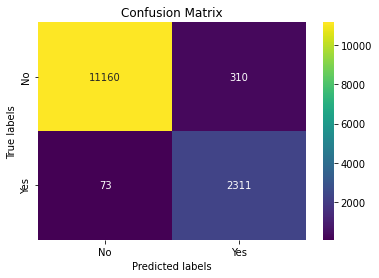

In [16]:
# Generate predictions for test data based on the model with best parameters generated by GridSearchCV 
y_pred = grid_search.predict(X_test)

# Generate confusion matrix for evaluation
confusion = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plot_confusion_matrix(confusion)

# print classification report
print(classification_report(y_test, y_pred))



---



---
## Question 6: Training, and hyper-parameter tuning of the Random Forest model.  

Fixed hyper-parameters (do not change the values of these hyper-parameters): 

- `n_estimators`: 150, 200
- `class_weight`: Only two pairs. Choose one of these two combinations and explain why.
1. A weight of (80% for class 1, 20% for class 0) and (70% for class 1, 30% for class 0)
2.  A weight of (80% for class 0, 20% for class 1) and (70% for class 0, 30% for class 1). 
- 3-fold cross-validation for the grid search.
- `f1` as the score to choose the best model in the grid search.
- `n_jobs`=-1
- do not include the heatmaps in the final submission

Other hyper-parameters: 

- `max_features`: 20, 30
- `min_samples_split`: 20, 25
- you can change the previous hyper-parameters (`max_features` and `min_samples_split`) or add other hyper-parameters if you wish. An explanation must be given to why you made that decision. 

---


<b> Rationale: What are you doing to solve this question?-75 words lilmit:</b>


################################################################################

I created a variable for the random forest classifier. Then I created a parameter grid variable containing different options for the specified hyper-parameters. This was then entered into the 3-fold cross-validation grid search. At this point I fit the model to the training set and checked the f1 score (not shown in final version) to check other values for ‘max_features’ (10, 30, 40) and ‘min_sample_split’ (15, 30 etc). Some combinations gave a slightly better f1 score but increased the false negatives and false positives in the confusion matrix so I decided to leave the original values. I also tried adding max_leaf_nodes but this made the f1 score worse. 

################################################################################

In [17]:
forest = RandomForestClassifier(random_state=2, n_jobs=-1)

#Defining the hyper-parameters grid:
param_grid2 = {'n_estimators': [150,200], 'class_weight':[{0: w} for w in [0.2, 0.3]], 'max_features': [20,30], 'min_samples_split': [20,25]}

grid_search2 = GridSearchCV(forest, param_grid=param_grid2, cv = 3, scoring='f1')

In [ ]:
grid_search2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(grid_search2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_search2.score(X_test, y_test)))

print("Best hyper-parameters: {}".format(grid_search2.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search2.best_score_))

---

---
## Question 7: Evaluation of the Random Forest model on the training and test sets. Use the function `plot_confusion_matrix(confusion_matrix)` provided above.
---

<b> Rationale: What are you doing to solve this question?-50 words limit:</b>

################################################################################

(double-click here)


################################################################################

In [ ]:
# Generate predictions for test data based on the model with best parameters generated by GridSearchCV 
y_pred2 = grid_search2.predict(X_test)

# Generate confusion matrix for evaluation
confusion2 = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(confusion2)

print(classification_report(y_test, y_pred2))



---



---
## Question 8: Based on the research questions and the instructions; What model would you choose if any? Would you deploy this model?  - 300 words limit.
---

<b> 300 words limit </b>

################################################################################

(double-click here)


################################################################################

In [ ]:
# Python code here (10 lines limit, and 2 cells limit)
import numpy as np


def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (7,8)
    # Sort feature importances in ascending order
    indices = np.argsort(model.feature_importances_)
    
    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]
    
    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(X.shape[1]), model.feature_importances_[indices])
    plt.yticks(range(X.shape[1]), columns_name)
    plt.show()

plot_feature_importances(grid_search2.best_estimator_)

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (6,4)
    #locate indices of the features with feature importance greater than 0.01. Sort descending
    indices = np.argsort(model.feature_importances_)
    indices = indices[-17:]
    
    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]
    
    #extract the number of features that have non-zero feature importance
    n_features = X.iloc[:,indices].shape[1]
    
    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(n_features), model.feature_importances_[indices])
    plt.yticks(range(n_features), columns_name)
    plt.show()

plot_feature_importances(grid_search2.best_estimator_)    



---



---
## Question 9: Use SHAP for the final model and give some explanation of what you observe. If you haven't chosen any model in question 8, choose the best model according to the evaluation metrics. Comment the results.
---

<b> Explanation of what you observe - 100 words limit:</b>

################################################################################

(double-click here)


################################################################################

In [ ]:
# create new model with best hyper-parameters from grid search
forest_final = RandomForestClassifier(random_state=2, n_jobs=-1, class_weight={0:0.3,1:0.7}, max_features=30, min_samples_split=20, n_estimators=200)

# fit model to training set 
forest_final.fit(X_train, y_train)

In [ ]:
# Using SHAP to explain predictions
explainer_Model1 = shap.TreeExplainer(forest_final, X_train, feature_dependence="independent")       
shap_values_Model1_train = explainer_Model1.shap_values(X_train)

# Summary plot - SHAP
shap.summary_plot(shap_values_Model1_train, X_train, feature_names= X_train.columns)

feature_dependence = "independent" has been renamed to feature_perturbation = "interventional"! See GitHub issue #882.
 96%|=================== | 106448/110826 [39:53<01:38]       



---



© 2022 Copyright The University of New South Wales - CRICOS 00098G